In [ ]:
import pandas as pd
df=pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
print("shape of the dataset is:",df.shape)
print("information of the dataset:\n",df.info)
print("Null values:",df.isnull().sum())
print("Size of the dataset:",df.size)
print("Maximum value is:",df['Profit'].max())
print("Minimum value is:",df['Profit'].min())

shape of the dataset is: (50, 5)
information of the dataset:
 <bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


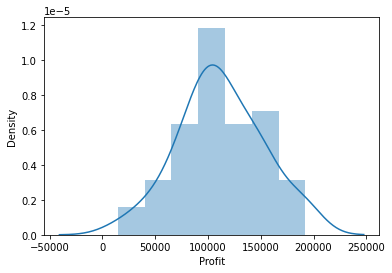

In [ ]:
sns.distplot(df['Profit']) #Data Visualization:This is also undercome EDA
#  here the averege profit which is 100k is the most frequent i.e.this should be in the category of distribution plot.
# And the profit range is in between the 0 and 250k.

In [ ]:
print(" 'The co-relation':\n ",df.corr()['Profit'])

 'The co-relation':
  R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64


Separating input and output

In [ ]:
x=df.iloc[:,:-1]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
y=df.iloc[:,4]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

One Hot Encoding

In [ ]:
state=pd.get_dummies(x['State'])
x=x.drop('State',axis=1)
x=pd.concat([x,state],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
print("Shape of x:",x.shape)
print("Shape of y:",y.shape)
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x: (50, 6)
Shape of y: (50,)
Shape of x_train: (37, 6)
Shape of y_train: (37,)
Shape of x_test: (13, 6)
Shape of y_test: (13,)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("The prediction values")
y_prediction=model.predict(x_test)
print(y_prediction)

The prediction values
[104440.72582616 132253.81567698 132872.07174272  71707.78771428
 178678.9934985  115078.13124331  66093.9297267   98759.7276409
 114113.5994088  167979.49411476  95786.77295823  87785.3497979
 110455.98228344]


In [ ]:
print("Length of y prediction")
len(y_prediction)

Length of y prediction


13

In [ ]:
print("Values of y_test")
y_test

Values of y_test


28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
Name: Profit, dtype: float64

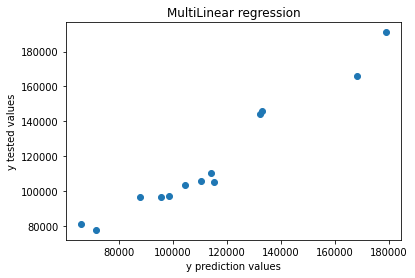

In [ ]:
import matplotlib.pyplot as plt
plt.title("MultiLinear regression")
plt.scatter(y_prediction,y_test)
plt.xlabel("y prediction values")
plt.ylabel("y tested values")
plt.show()

In [ ]:
df1=pd.DataFrame({'Actual':y_test,'Prediction':y_prediction})
df1.head

<bound method NDFrame.head of        Actual     Prediction
28  103282.38  104440.725826
11  144259.40  132253.815677
10  146121.95  132872.071743
41   77798.83   71707.787714
2   191050.39  178678.993499
27  105008.31  115078.131243
38   81229.06   66093.929727
31   97483.56   98759.727641
22  110352.25  114113.599409
4   166187.94  167979.494115
33   96778.92   95786.772958
35   96479.51   87785.349798
26  105733.54  110455.982283>

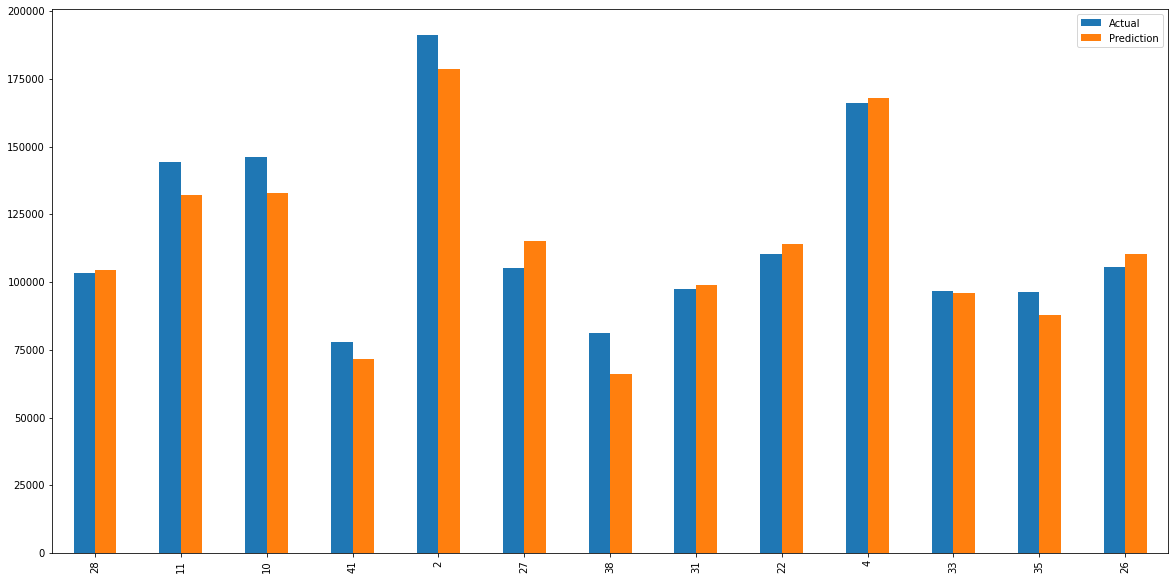

In [ ]:
df1.plot(figsize=(20,10),kind='bar')

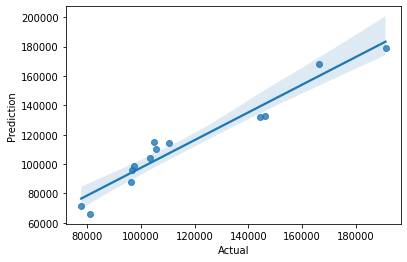

In [ ]:
import seaborn as sns
sns.regplot(x='Actual',y='Prediction',data=df1)

In [ ]:
from sklearn.metrics import r2_score
print("The model score(r2_score)")
r2_score(y_prediction,y_test)*100

The model score(r2_score)


92.74392060462607

Plotings

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
corelation=df.corr()
corelation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


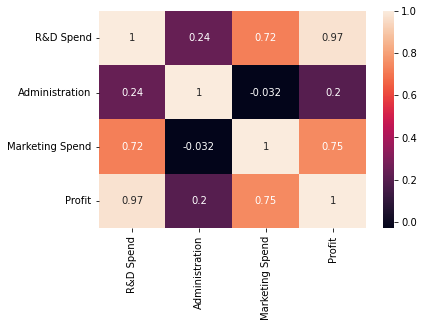

In [ ]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

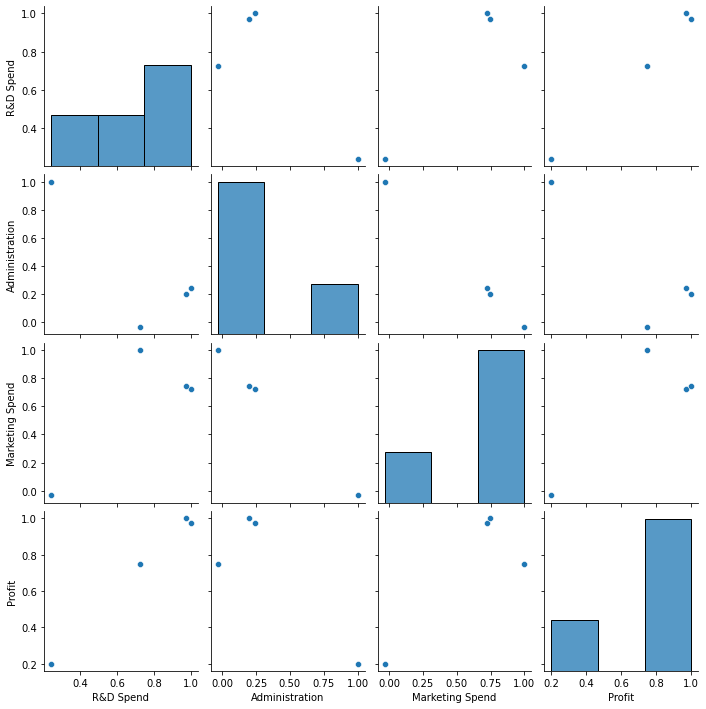

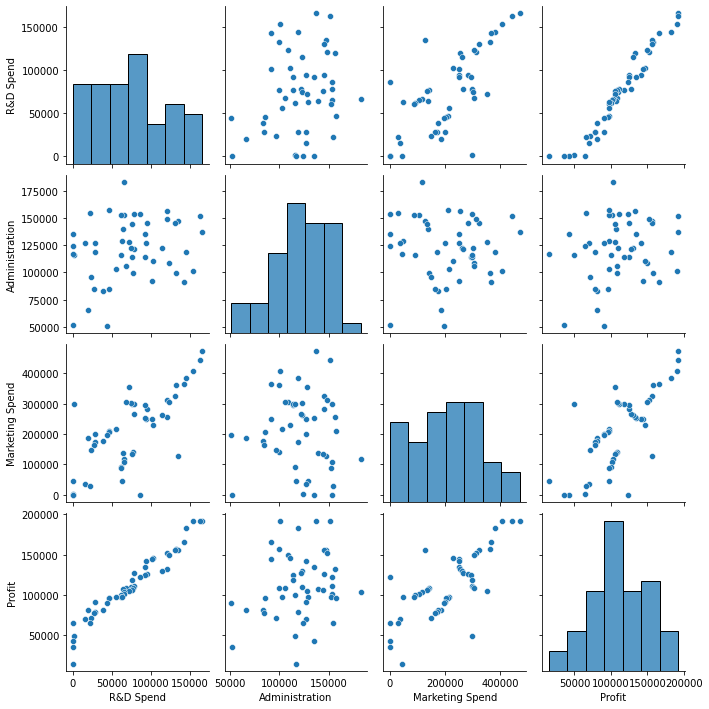

In [ ]:
sns.pairplot(corelation)
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


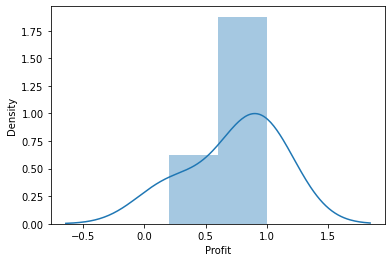

In [ ]:
sns.distplot(corelation['Profit'])